# Customer Churn Prediction Dashboard

This notebook provides an end-to-end solution for predicting customer churn using a Random Forest model. It includes data exploration, model training, an interactive prediction tool, and model evaluation. Users can input customer data and receive actionable insights on whether the customer is likely to churn and what actions might be taken to retain them.

## Data Loading and Preprocessing

In this section, we load the customer churn dataset, clean it by removing irrelevant columns, and preprocess the data by encoding categorical features and scaling numerical features. This prepares the data for model training.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Drop irrelevant columns
df_cleaned = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encode categorical features
label_encoders = {}
for column in ['Geography', 'Gender']:
    label_encoders[column] = LabelEncoder()
    df_cleaned[column] = label_encoders[column].fit_transform(df_cleaned[column])

# Define features (X) and target (y)
X = df_cleaned.drop(columns=['Exited'])
y = df_cleaned['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

Here, we train a Random Forest model on the preprocessed data. The model will learn to predict customer churn based on features such as credit score, age, and geography.

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

## Data Exploration and Visualization

We visualize key aspects of the dataset to understand the distribution of features and the relationships between them. These insights help us to better understand the data and the factors that contribute to customer churn.

In [3]:
import matplotlib.pyplot as plt

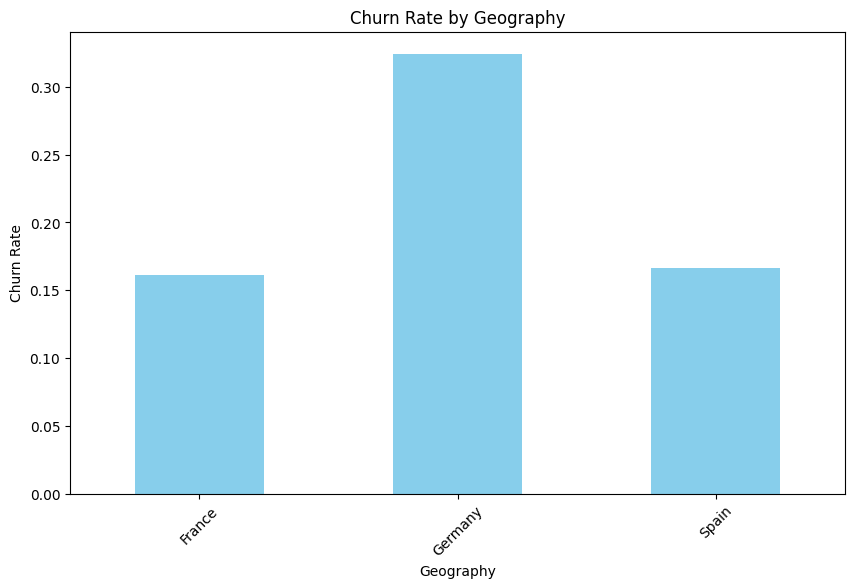

In [4]:
# Churn rate by Geography (Bar Chart)
churn_by_geography = df.groupby('Geography')['Exited'].mean()

# Create Bar Chart - Churn Rate by Geography
plt.figure(figsize=(10, 6))
churn_by_geography.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

### Churn Rate by Geography
This bar chart shows the churn rate for customers in different geographical regions, helping to identify which regions have higher churn rates.

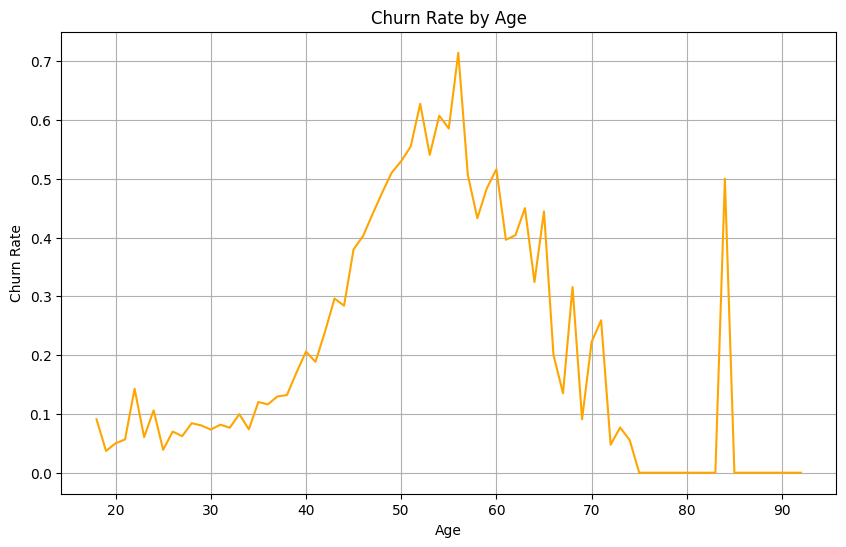

In [5]:
# Age vs Churn Rate (Line Graph)
churn_by_age = df.groupby('Age')['Exited'].mean()

# Create Line Graph - Age vs Churn Rate
plt.figure(figsize=(10, 6))
churn_by_age.plot(kind='line', color='orange')
plt.title('Churn Rate by Age')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

### Age vs Churn Rate
The line graph shows how churn rate varies with age, highlighting whether certain age groups are more prone to churn.

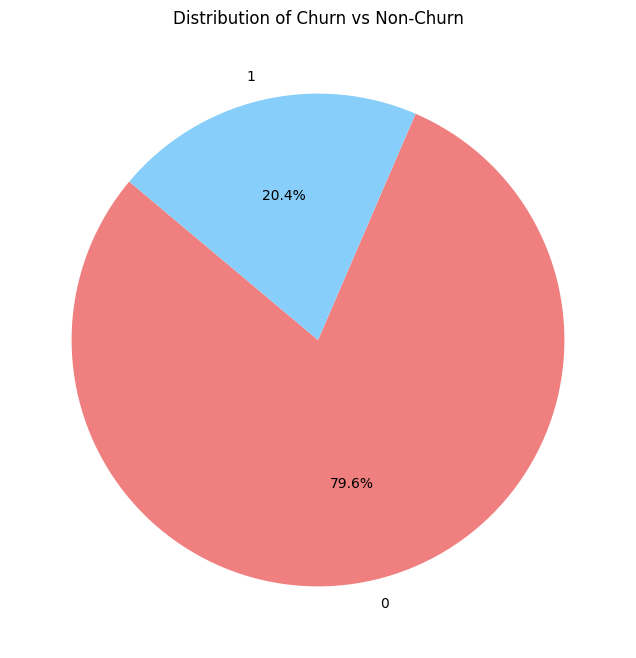

In [6]:
# Distribution of Churn vs Non-Churn (Pie Chart)
churn_distribution = df['Exited'].value_counts()

# Create Pie Chart - Distribution of Churn vs Non-Churn
plt.figure(figsize=(8, 8))
churn_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Churn vs Non-Churn')
plt.ylabel('')
plt.show()

### Distribution of Churn vs Non-Churn
This pie chart represents the proportion of customers who have churned versus those who have not, providing an overview of the dataset's balance.

## Churn Prediction Model

This section allows you to input customer data and receive a prediction on whether the customer is likely to churn. The tool also provides a recommendation for retention strategies based on the prediction.

In [7]:
# Define a function for user input and prediction
def predict_churn(credit_score, geography, gender, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary):
    # Convert categorical inputs to numerical (matching the encoding we used)
    geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
    gender_mapping = {'Male': 1, 'Female': 0}
    
    geography = geography_mapping[geography]
    gender = gender_mapping[gender]
    
    # Create a DataFrame for the input
    user_data = pd.DataFrame({
        'CreditScore': [credit_score],
        'Geography': [geography],
        'Gender': [gender],
        'Age': [age],
        'Tenure': [tenure],
        'Balance': [balance],
        'NumOfProducts': [num_of_products],
        'HasCrCard': [has_cr_card],
        'IsActiveMember': [is_active_member],
        'EstimatedSalary': [estimated_salary]
    })
    
    # Scale the input data using the same scaler we used for training
    user_data_scaled = scaler.transform(user_data)
    
    # Predict using the trained model
    prediction = rf_model.predict(user_data_scaled)[0]
    
    # Provide a recommendation based on the prediction
    if prediction == 1:
        recommendation = "This customer is likely to churn. Consider offering a loyalty program or personalized service to retain them."
    else:
        recommendation = "This customer is unlikely to churn."
    
    return prediction, recommendation

### Interactive Tool
Use the sliders and dropdowns below to input customer data, and then click "Predict Churn" to see whether the customer is likely to churn. The tool will also provide a recommendation based on the prediction.

In [8]:
import ipywidgets as widgets
from IPython.display import display

# Define the widgets for user inputs
credit_score_widget = widgets.IntSlider(value=650, min=300, max=850, step=1, description='Credit Score:')
geography_widget = widgets.Dropdown(options=['France', 'Spain', 'Germany'], value='Germany', description='Geography:')
gender_widget = widgets.Dropdown(options=['Male', 'Female'], value='Male', description='Gender:')
age_widget = widgets.IntSlider(value=45, min=18, max=100, step=1, description='Age:')
tenure_widget = widgets.IntSlider(value=5, min=0, max=10, step=1, description='Tenure:')
balance_widget = widgets.FloatSlider(value=75000, min=0, max=250000, step=1000, description='Balance:')
num_of_products_widget = widgets.IntSlider(value=2, min=1, max=4, step=1, description='Num of Products:')
has_cr_card_widget = widgets.Checkbox(value=True, description='Has Credit Card')
is_active_member_widget = widgets.Checkbox(value=True, description='Is Active Member')
estimated_salary_widget = widgets.FloatSlider(value=50000, min=0, max=200000, step=1000, description='Estimated Salary:')

# Function to display prediction and recommendation
def show_prediction(credit_score, geography, gender, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary):
    prediction, recommendation = predict_churn(credit_score, geography, gender, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary)
    print(f'Prediction: {"Churn" if prediction == 1 else "No Churn"}')
    print(f'Recommendation: {recommendation}')

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Churn")
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output
        show_prediction(
            credit_score_widget.value, 
            geography_widget.value, 
            gender_widget.value, 
            age_widget.value, 
            tenure_widget.value, 
            balance_widget.value, 
            num_of_products_widget.value, 
            has_cr_card_widget.value, 
            is_active_member_widget.value, 
            estimated_salary_widget.value
        )

predict_button.on_click(on_predict_button_clicked)

# Display all widgets and the button
display(
    credit_score_widget, 
    geography_widget, 
    gender_widget, 
    age_widget, 
    tenure_widget, 
    balance_widget, 
    num_of_products_widget, 
    has_cr_card_widget, 
    is_active_member_widget, 
    estimated_salary_widget, 
    predict_button, 
    output
)

IntSlider(value=650, description='Credit Score:', max=850, min=300)

Dropdown(description='Geography:', index=2, options=('France', 'Spain', 'Germany'), value='Germany')

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

IntSlider(value=45, description='Age:', min=18)

IntSlider(value=5, description='Tenure:', max=10)

FloatSlider(value=75000.0, description='Balance:', max=250000.0, step=1000.0)

IntSlider(value=2, description='Num of Products:', max=4, min=1)

Checkbox(value=True, description='Has Credit Card')

Checkbox(value=True, description='Is Active Member')

FloatSlider(value=50000.0, description='Estimated Salary:', max=200000.0, step=1000.0)

Button(description='Predict Churn', style=ButtonStyle())

Output()

## Model Evaluation

Finally, we evaluate the performance of the Random Forest model using metrics like accuracy, confusion matrix, and AUC-ROC curve. These metrics help us understand how well the model is performing and where it might be improved.

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

### Metrics Explanation

- **Accuracy**: The percentage of correct predictions out of all predictions made.
- **Confusion Matrix**: A table showing the true positives, true negatives, false positives, and false negatives.
- **Classification Report**: A detailed report including precision, recall, and F1-score for each class.
- **AUC-ROC Score**: The Area Under the ROC Curve, which summarizes the model's ability to distinguish between classes.

Accuracy: 0.86
Confusion Matrix:
[[1543   64]
 [ 208  185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

AUC-ROC Score: 0.86


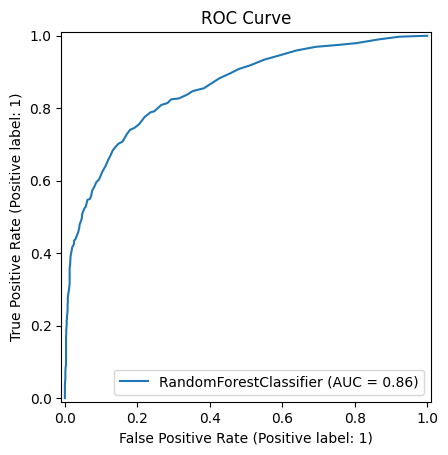

In [10]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'AUC-ROC Score: {roc_auc:.2f}')

# Plot the ROC Curve using the newer API
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

## Conclusion

This dashboard provides a comprehensive tool for exploring and predicting customer churn. The visualizations offer insights into key factors influencing churn, while the prediction tool helps you assess individual customers. The model evaluation metrics indicate that the Random Forest model performs well, with room for further refinement.

Moving forward, you could enhance this tool by incorporating additional data sources, experimenting with other machine learning models, or even deploying the model as a web application to make it accessible to a wider audience. The interactive features and clear metrics provided in this notebook make it a valuable asset for understanding and mitigating customer churn.